# Project 2

## Akshita Agarwal and Megan Bull
## CMPS 360: How to Think Like a Data Scientist 

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

### Link to the data
The data analyzed in this is sourced from: http://insideairbnb.com/get-the-data.html.
The website mentions that the data is made available under a Creative Commons CC0 1.0 Universal (CC0 1.0) "Public Domain Dedication" license which allows one to "copy, modify, distribute and perform the work, even for commercial purposes, all without asking permission". For more information, please see: https://creativecommons.org/publicdomain/zero/1.0/.

In [2]:
listings_df = pd.read_csv('listings.csv')
listings_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,3362,"Convention Center Rowhouse & In Law: 2 Units, 4BR",2798,Ayeh,NaN,"Shaw, Logan Circle",38.90982,-77.02016,Entire home/apt,433,2,178,2020-02-13,1.31,5,131
1,3663,Classic Rowhouse: Porch+ART+Parking,4617,Shawn & Richard,NaN,"Brightwood Park, Crestwood, Petworth",38.95888,-77.02554,Entire home/apt,154,3,41,2018-05-21,0.35,1,51
2,3670,Beautiful Sun-Lit U Street 1BR/1BA,4630,Sheila,NaN,"Howard University, Le Droit Park, Cardozo/Shaw",38.91842,-77.02750,Private room,75,2,79,2018-07-25,1.30,1,0
3,3686,Vita's Hideaway,4645,Vita,NaN,Historic Anacostia,38.86314,-76.98836,Private room,55,2,71,2019-08-05,0.62,2,349
4,3771,Mt. Pleasant,4795,Charlene,NaN,"Columbia Heights, Mt. Pleasant, Pleasant Plain...",38.92760,-77.03926,Private room,88,1,1,2009-01-21,0.01,1,0


In [3]:
listings_df.shape

(9294, 16)

In [4]:
listings_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

### Deciphering Column Names

The column names are not provided on the source website but we deem them to be rather self-explanatory.

### Data Cleaning

Firstly, we check if there are any columns in ``listings_df`` with null values.

In [5]:
listings_df.isnull().any()

id                                False
name                               True
host_id                           False
host_name                          True
neighbourhood_group                True
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                        True
reviews_per_month                  True
calculated_host_listings_count    False
availability_365                  False
dtype: bool

We truncate ``listings_df`` to include only those columns with no null values.

In [6]:
listings_df = listings_df[['id', 'host_id', 'neighbourhood', 'latitude', 
                          'longitude', 'room_type', 'price', 'minimum_nights', 
                           'number_of_reviews', 'calculated_host_listings_count', 
                           'availability_365']]

In [7]:
listings_df = listings_df.drop_duplicates() 
listings_df.shape

(9294, 11)

The ``.drop_duplicates()`` command did not contribute anything to the data cleaning process, as evident by the shape command above; in hindsight, it was redundant. Finally, we drop any columns consisting exclusively of ``NaN`` values from ``listings_df``.

In [8]:
listings_df = listings_df.dropna(axis=1, how='all')
listings_df.shape

(9294, 11)

The ``.dropna(axis=1, how='all')`` command, just like the ``.drop_duplicates()`` command, did not contribute anything to the data cleaning process

## Q-1 Does a Simple Linear Regression Model explain the relationship between the ``number_of_reviews`` and the ``price`` of the Airbnb Listings? 

### It seems believable that the Airbnb listings that amass more attention might also charge a premium for their listings, either unwittingly or studiedly. In this question, we take ```number_of_reviews``` of the Airbnb listings as a proxy variable to the amount of attention the listings garner. This question will attempt to predict the ``price`` of the Airbnb Listings based on the ``number_of_reviews`` they have accumulated using Simple Linear Regression analysis.

We begin our univariate linear regression analysis by drawing a scatterplot of our dataset and check to see if we can visually detect a relationship ```price``` and ```number_of_reviews```.

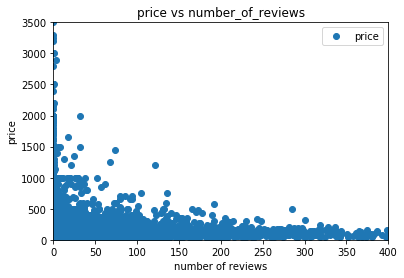

In [9]:
# Define the scatterplot
listings_df.plot(y='price', x='number_of_reviews', style='o')  
plt.title('price vs number_of_reviews')  
plt.xlabel('number of reviews')  
plt.ylabel('price')  

# Specify the dimension of the plot
plt.xlim(0, 400)
plt.ylim(0, 3500)

# Display the plot
plt.show()

Based on the scatterplot above, we find it hard to discern a specific linear relationship between ```number_of_reviews``` and ```price```. Based on this graph, we predict that we would not find a strong _linear_ relationship between ```number_of_reviews``` and ```price```. 

Next, we investigate the distributions of ```number_of_reviews``` and ```price``` individually.

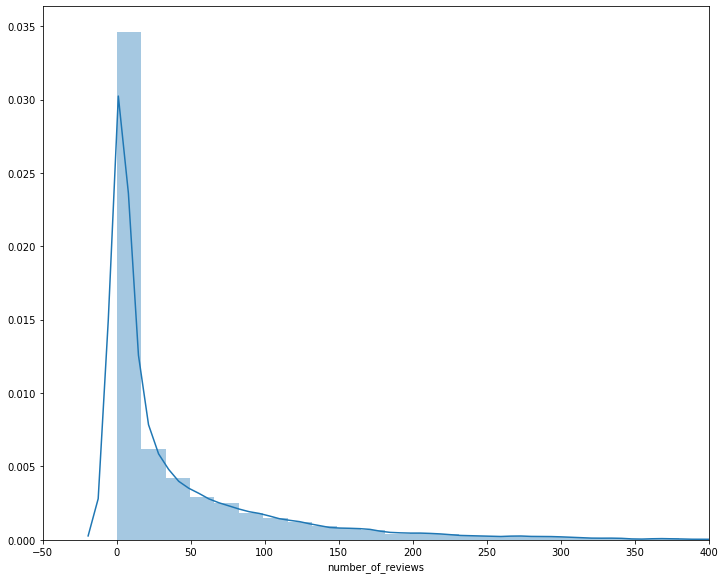

In [10]:
# Specify the dimensions 
plt.figure(figsize=(10,8))
plt.xlim(-50, 400)
plt.tight_layout()

# Specify the variable and display the plot
seabornInstance.distplot(listings_df['number_of_reviews'])

The distirbution of ``number_of_reviews`` is unimodal, with a clear peak at 0-20 reviews. The bulk of the distirbution is concentrated between 0-50, that is, the majority of the Airbnb listings receive 0-50 reviews with a few of them receiving 50-100 reviews. In other words, the graph is strongly skewed to the right. Next, we investigate the distirbution of ``price``.

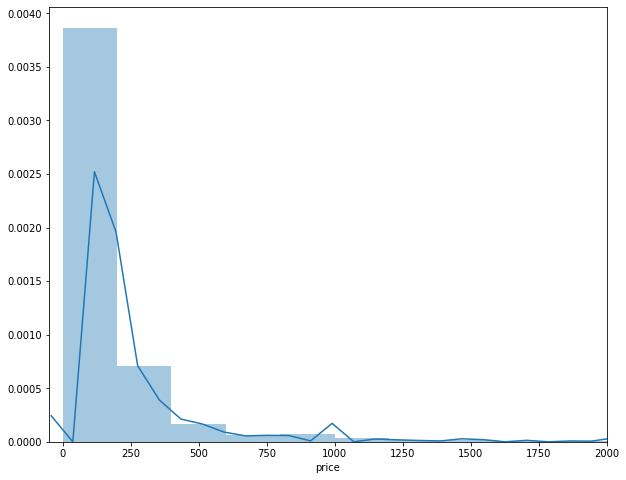

In [11]:
# Specify the dimensions 
plt.figure(figsize=(10,8))
plt.tight_layout()
plt.xlim(-50, 2000)

# Specify the variable and display the plot
seabornInstance.distplot(listings_df['price'])

The distribution of ``price`` is unimodal too with a strong right skew and a clear peak at around $125. The bulk of the distirbution is concentrated between 0 to 250 dollars, that is, the majority of the Airbnb listings are priced somewhere between 0 to 250 dollars with a few of them being priced at 250 to 400 dollars.

Now, we want to predict the ```price``` of the listings based on the ```number_of_reviews``` recorded. Since 'attributes' are the independent variables while 'labels' are the dependent variables of a regression model in data-science-speak, our attribute set will consist of the ```number_of_reviews``` column (which we will store in the X-variable), and the label will consists of the ```price``` column (which we will store in Y-variable).

In [12]:
# Specify the attribute and the label 

X = listings_df['number_of_reviews'].values.reshape(-1,1)
y = listings_df['price'].values.reshape(-1,1)

Next, we split the dataset: we assign 80% of the data to the training set and 20% of the data to the test set to evaluate the fit of the linear regression model to our data. Note the ```test_size``` variable is used to specify the proportion of the test set.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

After successfully splitting the data into training and testing sets, we now train our algorithm.

In [14]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Finally, we diplay the value of the intercept and the slope calculated by the linear regression algorithm for our dataset:

In [15]:
# Retrieve the intercept value
intercept_value = regressor.intercept_

# Retrieve the slope value
slope_value = regressor.coef_

# Display the slope and the intercept values
print("Intercept = {intercept}; Slope = {slope}".format(intercept = intercept_value, slope = slope_value))

Intercept = [244.67125463]; Slope = [[-0.73627513]]


_Interpretation:_ For every unit increase in the ```number_of_reviews```, the ```price``` of a listing decreases by about 73%. Certainly, this result is quite anti-intuitive! It is imperative to note that this result is based on the assumption that a linear model is a good fit to our data on ```number_of_reviews``` and ```price```; however, we have evidence from our initial scatterplot that a linear model might not be a good fit. Eventually, we will investigate this phenomenon by using our test data and checking how accurately our algorithm was able to predict the ``price`` of the listings. Before that, since we have trained our algorithm, we make some predictions regarding ``price``, while maintaining the linearity assumption.

In [16]:
y_pred = regressor.predict(X_test)

# Display the predicted price values
y_pred

array([[224.79182604],
       [131.28488417],
       [238.78105357],
       ...,
       [244.67125463],
       [230.68202711],
       [243.9349795 ]])

Let's plot the line of regression computed using the test data onto the original scatterplot:

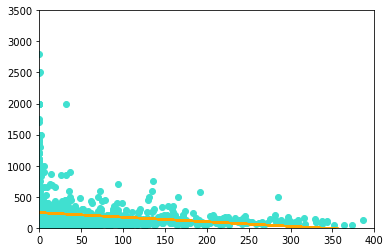

In [17]:
# Plot the line of regression
plt.scatter(X_test, y_test,  color='Turquoise')
plt.plot(X_test, y_pred, color='orange', linewidth=2)

# Specify the dimension of the plot
plt.xlim(0, 400)
plt.ylim(0, 3500)

# Display the plot
plt.show()

Finally, we compare the actual output values for ``X_test`` with the values predicted by our algorithm, that is, we investigate the accuracy of the linearity assumption of the model.

In [18]:
# Specify a dataframe with the actual and the predicted values 
evaluate_df = pd.DataFrame({'Actual Price': y_test.flatten(), 'Predicted Price': y_pred.flatten()})

# Dislay the first 5 values of the dataframe.
print(evaluate_df.head())

# Display the size of evaluate_df
print(evaluate_df.shape)

   Actual Price  Predicted Price
0           435       224.791826
1           195       131.284884
2            40       238.781054
3           100       243.934979
4           150       244.671255
(1859, 2)


Since ``evaluate_df`` is a fairly large dataset, we choose to display only the first 5 values (in sequential order). While we can guess that there is a sizeable difference between the actual and the predicted price values beased on the 5 values displayed, to compare the actual and the predicted values more fully, we draw a comparative barchart of the first 80 values of ```evaluate_df```:

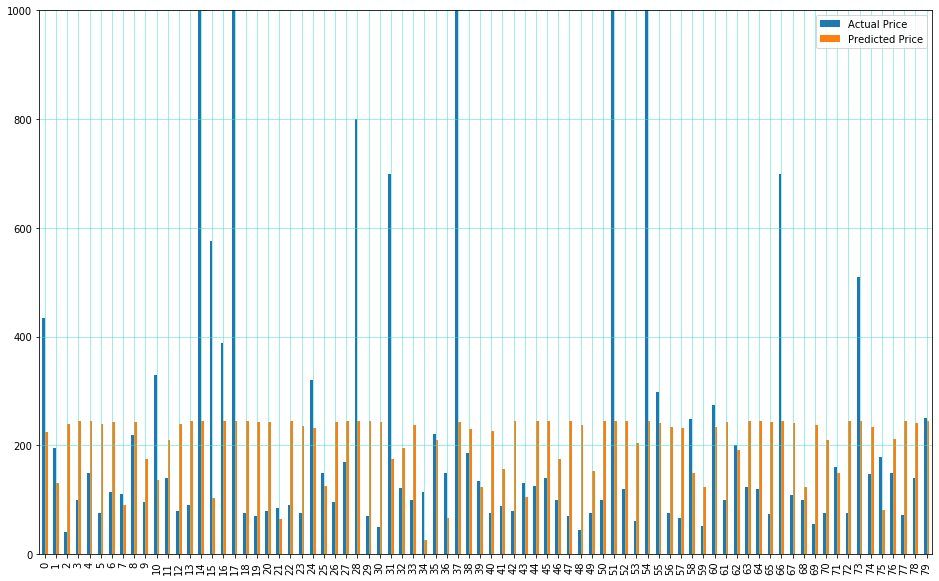

In [19]:
# Specify the comparative barchart
evaluate_df_vis = evaluate_df.head(80)
evaluate_df_vis.plot(kind='bar',figsize=(16,10))

# Specify the background format of the comparative barchart
plt.grid(which='major', linestyle='-', linewidth='0.5', color='turquoise')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

# Specify the dimension of the plot
plt.ylim(0, 1000)

# Display the barchart
plt.show()

Based on the comparative barchart above, we can conclude that our linear regression model was largely inacurrate in predicting the ``price`` of the listings based on the ``number_of_reviews``. On certain occasions, the price predicted by our algorithm was inflated while at others, it was deflated. In either case, the lack of accuracy of the algorithm was invariable. 

This inaccuracy might be accounted for by the fact that a *simple* linear regression model does not fit our data well. In other words, variables other than ``number_of_reviews`` might influence ``price`` more profoundly. Thus, in the next question, we investigate how variables such as ``minimum_nights`` ,```number_of_reviews```, ``reviews_per_month``, ``calculated_host_listings_count`` , and ```availability_365``` can be used to predict the prices of the listings.

# Q-2 Does a Multiple Linear Regression model accurately predict the ``price`` of the listings based on ``minimum_nights``, ```number_of_reviews```, ``calculated_host_listings_count``, and ```availability_365```?

Here, we attempt to predict the ``price`` of Airbnb listings based on ``minimum_nights`` ,```number_of_reviews```, ``calculated_host_listings_count`` , and ```availability_365``` and then investigate the validity of the Multiple Linear Regression model to our data.

First, we divide the data into 'attributes' and 'label'. 

In [20]:
X = listings_df[['minimum_nights', 'number_of_reviews', 
                 'calculated_host_listings_count', 'availability_365']]
y = listings_df['price']

Next, we split 80% of the data to the training set while 20% of the data to test set using below code.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Analogous to the slope value we displayed in the simple linear regression model, here, we display a dataframe composed of the coefficients of all the attributes. Needless to say, we would not display a line of best fit since such a line would have to be a hyperplane construction, elusive to human vision!

In [23]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, 
                        columns=['Coefficient'])  
coeff_df

,Coefficient
minimum_nights,-0.938735
number_of_reviews,-0.837385
calculated_host_listings_count,-0.450985
availability_365,0.192473


These coefficients are readily interpretted. ``minimum_nights``, ``number_of_reviews``, and ``calculated_host_listings_count`` negatively influence price, that is, an increase in any of these variables is correlated with a decrease in the price of the listings. Symmetrically, an increase in ``availability_365`` causes the price of the listings to increase.

In fact, we can provide a more precise interpretation of these coefficients. For example, for every extra day that a listing is made available, the price of the listing increases by $0.19. 

Similarly, every unit increase in the minimum number of nights associated with a listing, its price decrease by $0.94. 

In [24]:
y_pred = regressor.predict(X_test)

Next, we inquire the suitability of the Multiple Linear Regression Model to the data under study. Analogous to ``evaluate_df``, we construct ``coeff_df``. For reasons mentioned above, we display only the first five values of ``coeff_df``.

In [25]:
coeff_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Display the first 5 results
coeff_df.head()

,Actual,Predicted
7257,435,227.186608
31,195,173.599887
7022,40,242.134559
8983,100,253.656343
7038,150,225.243684


To provide the reader with a more comprehensive picture of the validity of the Multiple Linear Regression model, we diaply a comparative barchart visualizing the first 80 values of the two columns of ``coeff_df``.

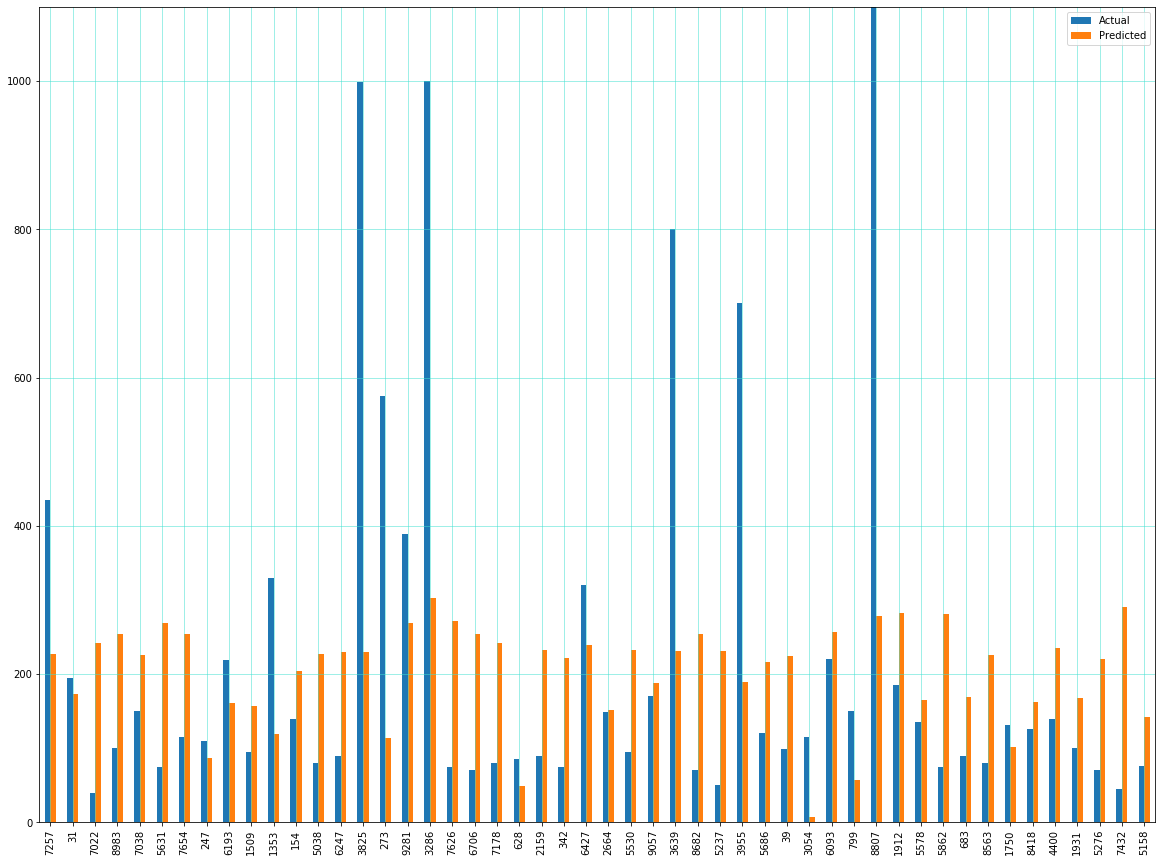

In [26]:
# Specify the comparative barchart
coeff_df_e = coeff_df.head(50)
coeff_df_e.plot(kind='bar',figsize=(20,15))

# Specify the background format of the comparative barchart
plt.grid(which='major', linestyle='-', linewidth='0.5', color='turquoise')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

# Specify the y-dimensions of the barchart
plt.ylim(0, 1100)

# Display the barchart
plt.show()

We obtain a rather peculiar graph! More often than not, the Multiple Linear Regression model overestimataes the price of the listings. On some spasmodic occasions, the algorithm extraordinarily underestimates the price of the listings. Just like the Simple Linear Regression model, the Multiple Linear Regression model does not satisfactorily fit the data. 

There are many factors that might have contributed to this inaccuracy. We list a few: 
- We might have been able to derive more accurate predictions if we would have started with a larger dataset.
- The assumption that our variables possess a linear relationship might have been erroneous, as attested by the intermittent visualization of the data above. 
- The attributes we used may not have had a high enough correlation to the ``price`` values we were trying to predict; however, based on our experiences, this is perhaps the weakest factor listed here.

# Q-3: How does the location of the Airbnb listings affect the listings' price, availability, and the type of room listed?

The first two questions inquired into how ``price`` is affected by other variables in our dataframe. Now, we shift gears a bit and inquire how the locations of the listings impact other variables in the dataframe.
- We can visualize the aforementioned question using a geochart, one revolving around population, and others revolving around price, number of listings, and availability.

In [27]:
import geopandas as gpd
import descartes
from shapely.geometry import Point, Polygon
from pyproj import CRS

- Now, we are going to create a map of DC using a [shape file](https://opendata.dc.gov/datasets/f6c703ebe2534fc3800609a07bad8f5b_17), that includes its neighborhoods. 

In [28]:
dc_map = gpd.read_file('Neighborhood_Clusters-shp/5e00ab4e-4cd2-43ba-b15e-5e56e0794b1c2020329-1-om6otp.drfpt.shp')
crs = CRS("ESRI:54009")

- Creating Points from our geopandas dataframe:

In [29]:
geometry = [Point(xy) for xy in zip(listings_df.longitude, listings_df.latitude)]

In [30]:
# Specifying our dataframe, coordinate reference system, and the geometry list we created (in that order)
dc_listings_gpd = gpd.GeoDataFrame(listings_df, 
                                   crs = crs,   
                                   geometry = geometry)  

- How many listings are there in each neighborhood?

In [31]:
neighbourhoods_df = listings_df[['neighbourhood', 'id']]
neighbourhoods_df.groupby('neighbourhood'
                     ).count().sort_values(by = 'id', ascending = False)

,id
neighbourhood,
"Columbia Heights, Mt. Pleasant, Pleasant Plains, Park View",886
"Union Station, Stanton Park, Kingman Park",872
"Capitol Hill, Lincoln Park",830
"Edgewood, Bloomingdale, Truxton Circle, Eckington",714
"Dupont Circle, Connecticut Avenue/K Street",710
"Shaw, Logan Circle",661
"Brightwood Park, Crestwood, Petworth",514
"Kalorama Heights, Adams Morgan, Lanier Heights",425
"Downtown, Chinatown, Penn Quarters, Mount Vernon Square, North Capitol Street",401


- A geochart showing the location of each listing and the corresponding room type:
     - Using base code from [here](https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972)

In [32]:
listings_df.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

Text(0.5, 1, 'Distribution of Types of Listings')

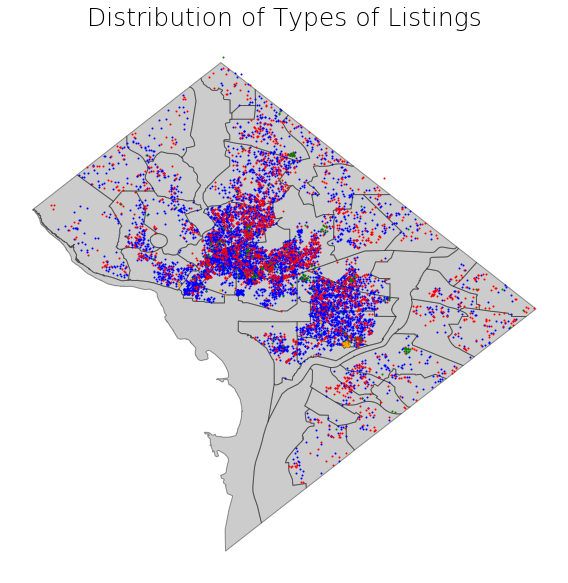

In [33]:
# Specify the dimensions and stylistic specificities of the geochart
fig,ax = plt.subplots(figsize = (10,10))
ax.axis('off')
dc_map.plot(ax=ax, alpha =0.4, color = 'grey', edgecolor = 'black')

# Specify the markers to be displayed on the geochart
dc_listings_gpd[dc_listings_gpd['room_type'] =='Entire home/apt'].plot(ax=ax, markersize =1, color='blue')
dc_listings_gpd[dc_listings_gpd['room_type'] =='Private room'].plot(ax=ax, markersize =1, color='red')
dc_listings_gpd[dc_listings_gpd['room_type'] =='Shared room'].plot(ax=ax, markersize =1, color='green')
dc_listings_gpd[dc_listings_gpd['room_type'] =='Hotel room'].plot(ax=ax, markersize =1, color='orange')

# Specify the title of the geochart
ax.set_title('Distribution of Types of Listings', fontdict={'fontsize': '25', 'fontweight' : '3'})

- Using Geopandas, we can create choropleth maps of number of listings per neighborhood, average price per neighborhood, and average availability per year per neighborhood. 
- Are the neighborhoods with the highest average price the same as the neighborhoods with the lowest number of listing (playing into supply and demand ratios)?
- Consequently, do the neighborhoods with the most listings have the lowest prices?

In [34]:
# Create a dataframe with the number of listings per neighborhood
n_df = listings_df.copy()
n_df = n_df[['neighbourhood', 'id']]
n_df = n_df.groupby('neighbourhood').count()
n_df.rename(columns={"id": "num_listings"}, inplace= True)

In [35]:
# Create a dataframe with total price and total availability per neighborhood 
# (to be used in computing averages of each neighborhood)
n_p_df = listings_df.copy()
n_p_df = n_p_df[['neighbourhood', 'price', 'availability_365']]
n_p_df = n_p_df.groupby('neighbourhood').sum()
n_p_df.rename(columns={"price": "total_price"}, inplace = True)

In [36]:
## Merge 'n_df' with 'n_p_df'
np_merged = pd.merge(n_df, n_p_df, left_on = 'neighbourhood', right_on = 'neighbourhood')

In [37]:
# Add columns of average prices and availability per neighborhood in `np_merged`
np_merged['avg_price'] = np_merged['total_price']/np_merged['num_listings']
np_merged['avg_availability_365'] = np_merged['availability_365']/np_merged['num_listings']
np_merged.head()

,num_listings,total_price,availability_365,avg_price,avg_availability_365
neighbourhood,,,,,
"Brightwood Park, Crestwood, Petworth",514,74330,67666,144.610895,131.645914
"Brookland, Brentwood, Langdon",162,19671,21831,121.425926,134.759259
"Capitol Hill, Lincoln Park",830,190509,125034,229.528916,150.643373
"Capitol View, Marshall Heights, Benning Heights",74,8368,9261,113.081081,125.148649
"Cathedral Heights, McLean Gardens, Glover Park",131,27101,12849,206.877863,98.083969


In [38]:
# Merge `np_merged` with our shapefile
map_merged1 = dc_map.merge(np_merged, how='left', 
                          left_on = 'NBH_NAMES',
                          right_on= 'neighbourhood')
map_merged1 = map_merged1[['NBH_NAMES','geometry', 'num_listings', 
                         'avg_price', 'avg_availability_365']]

- To find upper and lower bounds of our colorbar, we  find the maximum and mininum values of each variable we plan to make a choropleth map of. 

In [39]:
map_merged1.avg_price.max() 

356.9140845070423

In [40]:
map_merged1.avg_price.min() 

92.61702127659575

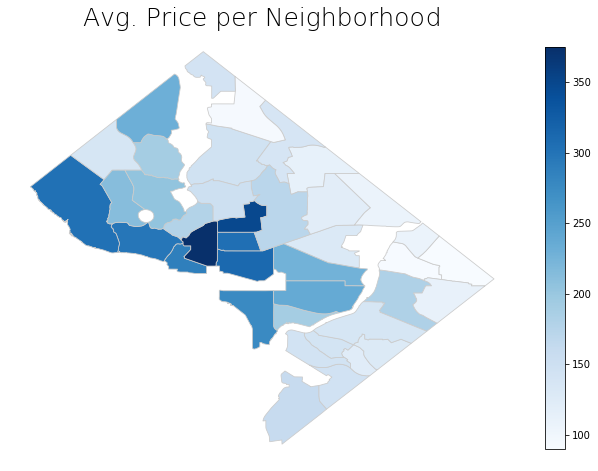

In [41]:
# Specify the variable, dimensions, and stylistic specificities of the geochart
variable = 'avg_price'
vmin, vmax = 90, 375
fig, ax = plt.subplots(1, figsize=(10,10))
ax.axis('off')

ax.set_title('Avg. Price per Neighborhood', fontdict={'fontsize': '25', 'fontweight' : '3'})

# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm._A = []
fig.colorbar(sm, fraction=0.036)

# create map
map_merged1.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

***NOTE:*** We decided to not label each neighborhood since each name is quite long and the regions aren't far enough apart from each other for the names to be legible. 

In [42]:
map_merged1.num_listings.max()

886.0

In [43]:
map_merged1.num_listings.min() 

9.0

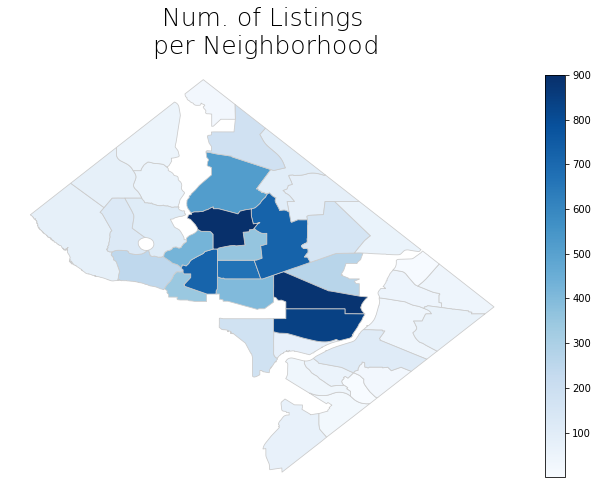

In [44]:
# Specify the variable, dimensions, and stylistic specificities of the geochart
variable = 'num_listings'
vmin, vmax = 1, 900
fig, ax = plt.subplots(1, figsize=(10,10))
ax.axis('off')

ax.set_title('Num. of Listings\n per Neighborhood', fontdict={'fontsize': '25', 'fontweight' : '3'})

# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm._A = []
fig.colorbar(sm, fraction=0.036)

# create map
map_merged1.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

In [45]:
map_merged1.avg_availability_365.max() 

205.44444444444446

In [46]:
map_merged1.avg_availability_365.min() 

54.214285714285715

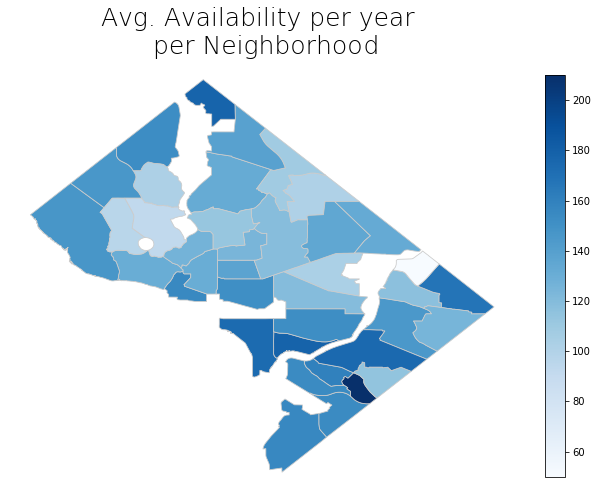

In [47]:
# Specify the variable, dimensions, and stylistic specificities of the geochart
variable = 'avg_availability_365'
vmin, vmax = 50, 210
fig, ax = plt.subplots(1, figsize=(10,10))
ax.axis('off')

ax.set_title('Avg. Availability per year \n per Neighborhood', fontdict={'fontsize': '25', 'fontweight' : '3'})

# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm._A = []
fig.colorbar(sm, fraction=0.036)

# create map
map_merged1.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

- Since we cannot easily see which neighborhood is which, we can use a sorted version of our dataframe to pick up on any correlations between the variables.
- First we will analyze the top ten neighborhoods by `avg_price`.

In [48]:
map_merged1.sort_values(by='avg_price', ascending = False).head(10)

,NBH_NAMES,geometry,num_listings,avg_price,avg_availability_365
13,"Dupont Circle, Connecticut Avenue/K Street","POLYGON ((-77.03455 38.91270, -77.03456 38.911...",710.0,356.914085,130.987324
14,"Howard University, Le Droit Park, Cardozo/Shaw","POLYGON ((-77.01389 38.92627, -77.01357 38.926...",357.0,333.103641,125.030812
5,"Downtown, Chinatown, Penn Quarters, Mount Vern...","POLYGON ((-77.00906 38.90566, -77.00906 38.903...",401.0,298.466334,150.077307
9,"Shaw, Logan Circle","POLYGON ((-77.03195 38.91410, -77.02962 38.914...",661.0,292.777610,137.266263
17,"Spring Valley, Palisades, Wesley Heights, Foxh...","POLYGON ((-77.08652 38.93469, -77.08642 38.934...",86.0,290.011628,146.104651
12,"Georgetown, Burleith/Hillandale","POLYGON ((-77.06518 38.91684, -77.06509 38.916...",248.0,285.568548,130.504032
6,"West End, Foggy Bottom, GWU","POLYGON ((-77.05011 38.90899, -77.05011 38.908...",346.0,277.375723,153.552023
15,"Southwest Employment Area, Southwest/Waterfron...","POLYGON ((-77.02192 38.88757, -77.01287 38.887...",181.0,265.662983,170.751381
38,"Capitol Hill, Lincoln Park","POLYGON ((-76.99496 38.89203, -76.99480 38.892...",830.0,229.528916,150.643373
25,"Hawthorne, Barnaby Woods, Chevy Chase","POLYGON ((-77.05530 38.95900, -77.05554 38.958...",59.0,223.644068,151.254237


- We can see here that in some neighborhoods the number of listings might impact the price. 
    - For example, both the `Hawthorne, Barnaby Woods, Chevy Chase` and `Spring Valley, Palisades, Wesley Heights, Foxhall Crescent, Foxhall Village, Georgetown Reservoir` neighborhoods have a very low number of listings, but are still among the top ten most expensive neighborhoods. 

- It is also interesting to note that listings in the top ten most expensive neighborhoods are only made available for less than half the year. In fact, if we take the average of `avg_availability_365` for the top ten most expensive neighborhoods, we see that they are availble for less than 40% of the year!

In [49]:
map_merged1.sort_values(by='avg_price', ascending = False).head(10).mean()

num_listings            387.900000
avg_price               285.305354
avg_availability_365    144.617140
dtype: float64

In [50]:
(144.617140/365) *100 ## a little bit of hard-coding for the purpose of finding the 
                    ## average percent of the year the top ten most expensive neighborhoods 
                    ## are available 

39.621134246575345

- Looking at the average of `num_listings` for the top ten most expensive neighborhoods, it is interesting to note that it falls towards the bottom of our range of number of listings per neighborhood. 
- We should be able to conclude then, that neighborhoods with less listings, tend to have higher prices. 
    - However, that would not be taking into account that we have outliers in this set such as the `Capitol Hill, Lincoln Park` neighborhood on the higher spectrum, and the `Hawthorne, Barnaby Woods, Chevy Chase` neighborhood on the lower spectrum. 

- Let's take a look at the top ten neighborhoods by `num_listings` next:

In [51]:
map_merged1.sort_values(by='num_listings', ascending = False).head(10)

,NBH_NAMES,geometry,num_listings,avg_price,avg_availability_365
33,"Columbia Heights, Mt. Pleasant, Pleasant Plain...","POLYGON ((-77.03523 38.93743, -77.03500 38.937...",886.0,149.037246,113.690745
30,"Union Station, Stanton Park, Kingman Park","POLYGON ((-76.98440 38.90032, -76.98419 38.900...",872.0,219.876147,119.896789
38,"Capitol Hill, Lincoln Park","POLYGON ((-76.99496 38.89203, -76.99480 38.892...",830.0,229.528916,150.643373
32,"Edgewood, Bloomingdale, Truxton Circle, Eckington","POLYGON ((-77.01081 38.94448, -77.01055 38.944...",714.0,168.247899,119.351541
13,"Dupont Circle, Connecticut Avenue/K Street","POLYGON ((-77.03455 38.91270, -77.03456 38.911...",710.0,356.914085,130.987324
9,"Shaw, Logan Circle","POLYGON ((-77.03195 38.91410, -77.02962 38.914...",661.0,292.777610,137.266263
20,"Brightwood Park, Crestwood, Petworth","POLYGON ((-77.01670 38.94657, -77.01681 38.946...",514.0,144.610895,131.645914
31,"Kalorama Heights, Adams Morgan, Lanier Heights","POLYGON ((-77.04165 38.92720, -77.04142 38.927...",425.0,174.936471,126.778824
5,"Downtown, Chinatown, Penn Quarters, Mount Vern...","POLYGON ((-77.00906 38.90566, -77.00906 38.903...",401.0,298.466334,150.077307
14,"Howard University, Le Droit Park, Cardozo/Shaw","POLYGON ((-77.01389 38.92627, -77.01357 38.926...",357.0,333.103641,125.030812


- We know that the highest average listing price in D.C. is $356/night, and clearly, that would be the `Dupont Circle, Connecticut Avenue/K Street` neighborhood.
- Looking at the other average prices, they seem to be in the middle of our original range, instead of towards the bottom as we expected they might be. 

- Lastly, we'll take a look at the top ten neighborhoods by `avg_availability_365`:

In [52]:
map_merged1.sort_values(by='avg_availability_365', ascending = False).head(10)

,NBH_NAMES,geometry,num_listings,avg_price,avg_availability_365
2,"Woodland/Fort Stanton, Garfield Heights, Knox ...","POLYGON ((-76.96877 38.86067, -76.96861 38.860...",9.0,122.777778,205.444444
3,"Near Southeast, Navy Yard","POLYGON ((-76.98726 38.87712, -76.98569 38.877...",82.0,186.012195,175.609756
24,"Colonial Village, Shepherd Park, North Portal ...","POLYGON ((-77.02829 38.98608, -77.02662 38.984...",35.0,141.714286,174.771429
29,"Twining, Fairlawn, Randle Highlands, Penn Bran...","POLYGON ((-76.96265 38.88244, -76.96145 38.882...",117.0,136.068376,171.863248
15,"Southwest Employment Area, Southwest/Waterfron...","POLYGON ((-77.02192 38.88757, -77.01287 38.887...",181.0,265.662983,170.751381
8,"Deanwood, Burrville, Grant Park, Lincoln Heigh...","POLYGON ((-76.91322 38.88976, -76.91940 38.889...",47.0,92.617021,165.404255
26,Historic Anacostia,"POLYGON ((-76.99004 38.86879, -76.98906 38.868...",62.0,140.290323,158.596774
0,"Congress Heights, Bellevue, Washington Highlands","POLYGON ((-76.99402 38.84520, -76.99351 38.844...",77.0,158.402597,154.207792
6,"West End, Foggy Bottom, GWU","POLYGON ((-77.05011 38.90899, -77.05011 38.908...",346.0,277.375723,153.552023
1,"Douglas, Shipley Terrace","POLYGON ((-76.97472 38.85287, -76.97421 38.852...",31.0,143.870968,152.451613


- We seem to have a pretty even spread of `avg_price` for the neighborhoods with the highest `avg_availability_365`. Let's look at the average of `avg_price` for the top ten most available neighborhoods.

In [53]:
map_merged1.sort_values(by='avg_availability_365', ascending = False).head(10).mean()

num_listings             98.700000
avg_price               166.479225
avg_availability_365    168.265272
dtype: float64

- Both the average `num_listings` and `avg_price` for the top ten most available neighborhoods seem pretty low. In fact, they are towards the bottom of their respective ranges we used in the maps above. 
- Which again, might play into a feeling of supply and demand in these neighborhoods. 
    - That is, the neighborhoods that are more available have a lower price. 
    - More nights available = more competition = lower prices 
- This makes sense then, that these neighborhoods have a relatively low average number of listings, almost as if the fewer number of listings compensates for the more available listings. 

# Q-4: Which neighborhood has the largest percentage difference between the number of listings offering an entire home/apartment and the number of listings offering a private room?

In the third question, we broadly looked into the type of rooms offered in each neighborhood. For our final question, we wish to understand the impact of the listings' location on the type of room offered in detail. In other third question, we also found out that the majority of the rooms offered were either an entire home/apt or a private room. So, here, we attempt to find the neighborhood that has the largest percentage difference in the number of entire home/apt offered and the number of single rooms offered. 

In [54]:
# Create a dataframe of with only entire home/apt listings
entire_home_apt_df = listings_df.copy()
entire_home_apt_df = entire_home_apt_df.loc[entire_home_apt_df['room_type'] == 
                                            'Entire home/apt'][['neighbourhood', 'room_type']]

In [55]:
# Obtain a count of the number of entire home/apt listings in each neighborhood
entire_home_apt_df_e = entire_home_apt_df.groupby(['neighbourhood']).count()
entire_home_apt_df_e.rename(columns = {'room_type':'entire_home_apt_count'}, inplace = True)

In [56]:
# Create a dataframe of with only private room listings
private_room_df = listings_df.copy()
private_room_df = private_room_df.loc[private_room_df['room_type'] == 
                                      'Private room'][['neighbourhood', 'room_type']]

In [57]:
# Obtain a count of the number of private room listings in each neighborhood
private_room_df_e = private_room_df.groupby(['neighbourhood']).count()
private_room_df_e.rename(columns = {'room_type':'private_room_count'}, inplace = True)

In [58]:
# Merge 'private_room_df_e' with 'entire_home_apt_df_e'
merged_df = pd.merge(entire_home_apt_df_e, private_room_df_e, on="neighbourhood")

# Obtain a count of the number of private rooms and entire homes/apts in each neighborhood
merged_df['total_num_listings'] = merged_df['entire_home_apt_count']+ merged_df['private_room_count']

In [59]:
# Find the percentage difference between the number of entire homes/apts and private rooms in each neighborhood
merged_df['Percent_diff'] = ((merged_df['entire_home_apt_count']/ merged_df['total_num_listings'])
                            -(merged_df['private_room_count']/merged_df['total_num_listings']))*100
merged_df.sort_values(by=['Percent_diff'], ascending=False).head()

,entire_home_apt_count,private_room_count,total_num_listings,Percent_diff
neighbourhood,,,,
"West End, Foggy Bottom, GWU",315,28,343,83.673469
"Downtown, Chinatown, Penn Quarters, Mount Vernon Square, North Capitol Street",354,45,399,77.443609
"Near Southeast, Navy Yard",67,11,78,71.794872
"Capitol Hill, Lincoln Park",643,135,778,65.295630
"Dupont Circle, Connecticut Avenue/K Street",567,130,697,62.697274


### Thus, the neighborhood with the largest percentage difference between the number of listings offering an entire home/apartment and the number of listings offering a private room is West End, Foggy Bottom, GWU. 

A quick glance at the ``Percent_diff`` column of ``merged_df`` reveals that the values for ``Percent_diff`` for neighborhoods are rather similar to each other. Thus, next, we visualize the ``Percent_diff`` columns via a geochart.

In [60]:
# Merge the shape file
map_merged2 = dc_map.merge(merged_df, how='left', 
                          left_on = 'NBH_NAMES',
                          right_on= 'neighbourhood')
map_merged2 = map_merged2[['NBH_NAMES','geometry', 'Percent_diff']]

In [61]:
map_merged2.Percent_diff.max()

83.6734693877551

In [62]:
map_merged2.Percent_diff.min()

-30.909090909090907

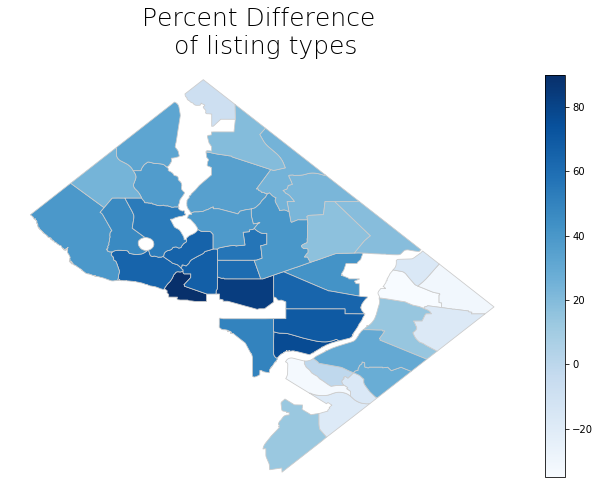

In [65]:
# Specify the variable, dimensions, and stylistic specificities of the geochart
variable = 'Percent_diff'
vmin, vmax = -35, 90
fig, ax = plt.subplots(1, figsize=(10,10))
ax.axis('off')

ax.set_title('Percent Difference \n of listing types', fontdict={'fontsize': '25', 'fontweight' : '3'})

# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# Enter empty array for the data range
sm._A = []
fig.colorbar(sm, fraction=0.036)

# Create map
map_merged2.plot('Percent_diff', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

From the above graph, we note that the neighborhoods situated toward the center of DC have relatively higher ``Percent_diff`` values. As we move toward the outskirts of DC, the ``Percent_diff`` values start to decrease.

This completes our investigation into the Airbnb listings in DC.

## Sources Consulted

Q1, 2: https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

Q3: https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972